# Анализ бизнес-показателей приложения Procrastinate Pro+

**Описание проекта**  

Несмотря на огромные вложения в рекламу, последние несколько месяцев развлекательное приложение Procrastinate Pro+ терпит убытки.  

Есть данные о пользователях, привлечённых `с 1 мая по 27 октября 2019 года`:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

**Цель проекта**  

Необходимо разобраться в причинах убыточности, помочь компании выйти в плюс и дать рекомендации для отдела маркетинга.

**План исследования:**  
1. Загрузить данные и подготовить их к анализу.
2. Задать функции для расчёта и анализа LTV, ROI, удержания, конверсии, а также функции для построения графиков.
3. Исследовательский анализ данных: 
  - составить профили пользователей, определить минимальную и максимальную даты привлечения пользователей. 
  - выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.
  - узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 
  - изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. 
4. Маркетинг:
  - посчитать общую сумму расходов на маркетинг
  - выяснить, как траты распределены по рекламным источникам.
  - построить визуализацию динамики изменения расходов во времени (по дням, неделям и месяцам) по каждому источнику.
  - узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.
5. Оценить окупаемость рекламы:
  - проанализировать общую окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
  - проанализировать окупаемость рекламы с разбивкой по всем доступным характеристикам пользователей — стране, устройству и источнику.
  - проанализировать конверсию и удержание клиентов по всем доступным характеристикам пользователей — стране, устройству и источнику.
  - проанализировать каналы привлечения в разбивке по рынку приложения (США и Европа)
6. Общий вывод и рекомендации для отдела маркетинга.

**Описание данных**  

Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта:
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.  

Файл `orders_info_short.csv` — хранит информацию о заказах:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.  

Файл `costs_info_short.csv` — хранит информацию о расходах на рекламу:
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

## Загружаем данные и подготавливаем их к анализу

In [1]:
# импортируем необходимые библиотеки:

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

# устанавливаем отображение

pd.set_option('display.max_columns', None)

In [2]:
# загружаем данные:
try:
    visits,orders,costs = (pd.read_csv('/datasets/visits_info_short.csv'),  # журнал сессий
                           pd.read_csv('/datasets/orders_info_short.csv'),  # покупки
                           pd.read_csv('/datasets/costs_info_short.csv'))   # траты на рекламу
except:
    visits,orders,costs = (pd.read_csv('C:\\Users\\myPC\\Downloads\\visits_info_short.csv'),  # журнал сессий
                           pd.read_csv('C:\\Users\\myPC\\Downloads\\orders_info_short.csv'),  # покупки
                           pd.read_csv('C:\\Users\\myPC\\Downloads\\costs_info_short.csv'))   # траты на рекламу

In [3]:
# функция для вывода необходимых характеристик датафрейма

def data_info(data):
    display(data.head(5))
    print('___________________________')
    print('')
    
    print('Информация о датафрейме')
    print(data.info())
    print('___________________________')
    print('')
    
    print('Описание числовых столбцов')
    display(data.describe())
    print('___________________________')
    print('')
    
    print('Количество пропусков в столбцах')
    print(data.isna().sum().sort_values())
    print('___________________________')
    print('')
    
    print('Количество явных дубликатов')
    print(data.duplicated().sum())
    print('___________________________')

In [4]:
for i in [visits, orders, costs]:
    display(data_info(i))

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

___________________________

Информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
___________________________

Описание числовых столбцов


User Id
count  3.099010e+05
mean   4.997664e+11
std    2.887899e+11
min    5.993260e+05
25%    2.493691e+11
50%    4.989906e+11
75%    7.495211e+11
max    9.999996e+11

___________________________

Количество пропусков в столбцах
User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64
___________________________

Количество явных дубликатов
0
___________________________


None

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

___________________________

Информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
___________________________

Описание числовых столбцов


User Id       Revenue
count  4.021200e+04  40212.000000
mean   4.990295e+11      5.370608
std    2.860937e+11      3.454208
min    5.993260e+05      4.990000
25%    2.511324e+11      4.990000
50%    4.982840e+11      4.990000
75%    7.433327e+11      4.990000
max    9.998954e+11     49.990000

___________________________

Количество пропусков в столбцах
User Id     0
Event Dt    0
Revenue     0
dtype: int64
___________________________

Количество явных дубликатов
0
___________________________


None

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

___________________________

Информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
___________________________

Описание числовых столбцов


costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000

___________________________

Количество пропусков в столбцах
dt         0
Channel    0
costs      0
dtype: int64
___________________________

Количество явных дубликатов
0
___________________________


None

Хвала дата-инженерам, в наших данных отсутствуют пропуски и дубликаты)  
Приведем в порядок наименование столбцов и изменим тип данных для столбцов с датой и временем.

In [5]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
orders.columns = ['user_id', 'event_dt', 'revenue']
costs.columns = ['dt', 'channel', 'costs']

In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

**Вывод**  

Загрузили наши данные, проверили на наличие пропусков и дубликатов (отсутствуют).  
Привели в порядок названия столбцов и преобразовали тип данных в столбцах с датой и временем.

## Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### `get_profiles()` функция для создания профилей пользователей

In [7]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### `get_retention()` функция для подсчёта Retention Rate

In [8]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### `get_conversion()` функция для подсчёта конверсии

In [9]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### `get_ltv()` функция для подсчёта LTV

In [10]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### `filter_data()` функция для сглаживания данных

In [11]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### `plot_retention()` функция для построения графика Retention Rate

In [12]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### `plot_conversion()` функция для построения графика конверсии

In [13]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### `plot_ltv_roi` функция для визуализации LTV и ROI

In [14]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

**Составим профили пользователей и определим минимальную и максимальную даты привлечения пользователей.**

In [15]:
profiles = get_profiles(visits, orders, costs)
profiles.sample(5)

user_id            first_ts   channel   device         region  \
63763  423189317586 2019-08-12 03:39:08   organic      Mac  United States   
65102  431960493972 2019-07-04 21:16:13  FaceBoom   iPhone  United States   
44652  295600894327 2019-06-18 07:32:16    TipTop       PC  United States   
66015  437987400590 2019-09-23 09:34:12   organic  Android  United States   
50121  332200502328 2019-07-09 21:27:04   organic   iPhone  United States   

               dt      month  payer  acquisition_cost  
63763  2019-08-12 2019-08-01  False          0.000000  
65102  2019-07-04 2019-07-01  False          1.111957  
44652  2019-06-18 2019-06-01  False          1.900000  
66015  2019-09-23 2019-09-01  False          0.000000  
50121  2019-07-09 2019-07-01  False          0.000000

In [16]:
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()

In [17]:
print('Минимальная дата привлечения пользователей {}'.format(min_date))
print('Минимальная дата привлечения пользователей {}'.format(max_date))

Минимальная дата привлечения пользователей 2019-05-01
Минимальная дата привлечения пользователей 2019-10-27


Минимальная и максимальная даты привлечения пользователей соответствуют периоду, указанному в задании.

**Рассмотрим пользователей приложения по следующим характеристикам:**  
- из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.  
- какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.  
- какие есть рекламные источники привлечения и из каких каналов пришло больше всего платящих пользователей.

Распределение пользователей приложения по region

                total  payers  perc_of_payers
region                                       
United States  100002    6902            6.90
UK              17575     700            3.98
France          17450     663            3.80
Germany         14981     616            4.11



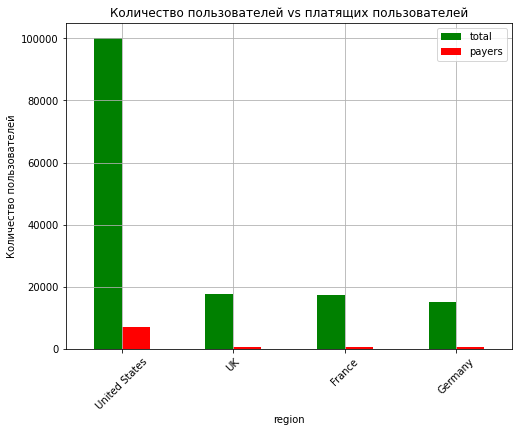

____________________________________________________________

Распределение пользователей приложения по device

         total  payers  perc_of_payers
device                                
iPhone   54479    3382            6.21
Android  35032    2050            5.85
PC       30455    1537            5.05
Mac      30042    1912            6.36



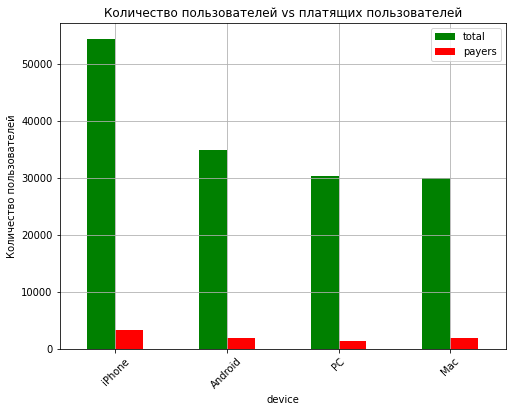

____________________________________________________________

Распределение пользователей приложения по channel

                    total  payers  perc_of_payers
channel                                          
organic             56439    1160            2.06
FaceBoom            29144    3557           12.20
TipTop              19561    1878            9.60
OppleCreativeMedia   8605     233            2.71
LeapBob              8553     262            3.06
WahooNetBanner       8553     453            5.30
RocketSuperAds       4448     352            7.91
MediaTornado         4364     156            3.57
YRabbit              4312     165            3.83
AdNonSense           3880     440           11.34
lambdaMediaAds       2149     225           10.47



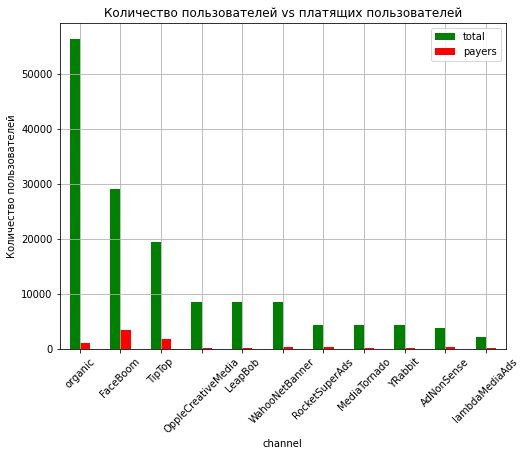

____________________________________________________________



In [18]:
parameters = ['region', 'device', 'channel']
for parameter in parameters:
    df = (profiles
          .groupby(parameter)
          .agg(total=('user_id', 'count'), payers=('payer', 'sum'), perc_of_payers=('payer', 'mean'))
          .sort_values(by='total', ascending=False))
    df['perc_of_payers'] = round(df['perc_of_payers'] * 100, 2)
    print(f'Распределение пользователей приложения по {parameter}')
    print()
    print(df)
    print()
    df.plot(kind='bar', figsize=(8,6), grid=True, color=['green','red'], y=['total', 'payers'])
    plt.title('Количество пользователей vs платящих пользователей')
    plt.xlabel(parameter)
    plt.ylabel('Количество пользователей')
    plt.xticks(rotation=45)
    plt.show()
    print('____________________________________________________________')
    print()

**Страна**  
Таблица и график выше наглядно демонстрируют, что больше всего пользователей приложения из Соединенных штатов (100тыс.человек), далее, примерно с одинаковым количеством, пользователи из Великобритании и Франции (приб. 17500 человек). Меньше всего пользователей из Германии (~15тыс. человек).  
Среди платящих пользователей также лидируют Соединенные штаты - 6902 человек или 6.9%. Далее идет Германия - 4.11 % и меньше всего платящих пользователей из Великобритании и Франции (3.98% и 3.8% соответственно).  

**Устройство**  
Большинство клиентов приложения пользуются iPhonе-ми - ~ 54500 человек, следом идет Android - 35тыс.пользователей, PC и Mac отстают - 30500 и 30 тыс. соответственно.  
Среди платящих пользователей популярность устройств распределена иначе: 6.36% используют Mac, 6.21% - iPhonе и далее идут Android (5.85%) и PC (5.05%).  

**Рекламные источники**  
Значительное количество клиентов приходят в приложение органическим путем - более 56тыс. человек.  
Среди платных каналов лидируют FaceBoom - ~ 29тыс. человек и TipTop - ~ 19500 человек. Меньше всего пользователей приходит от AdNonSense (3880чел.) и lambdaMediaAds (2149чел.).  
Интересно что немалый процент платных пользователей пришел из "немногочисленных" каналов - AdNonSense (11.34%) и lambdaMediaAds (10.47%). Лидером же по количеству привлеченных платных пользователей стал канал FaceBoom - 12.2%. Органический трафик показывает самый низкий процент платных пользователей - 2.06%  


**`Далее рассмотрим динамику привлечения всех пользователей по различным параметрам.`**

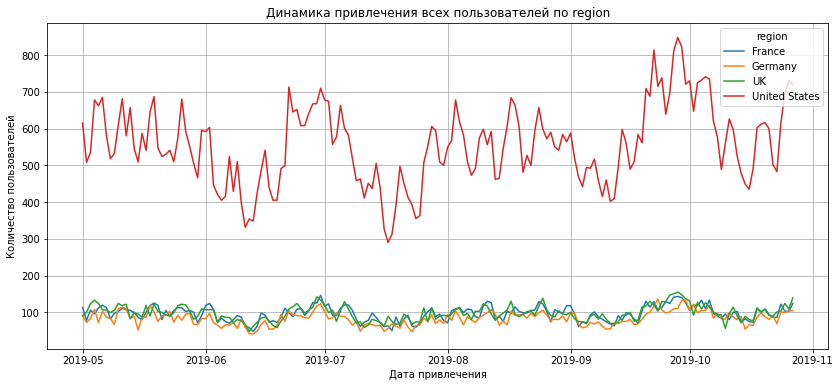

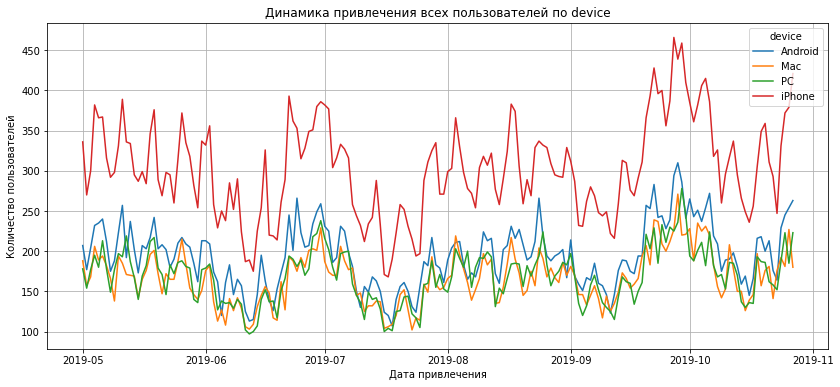

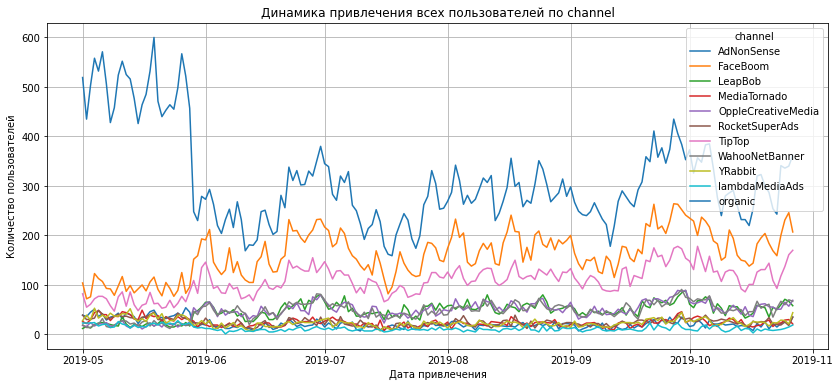

In [19]:
parameters = ['region', 'device', 'channel']
for parameter in parameters:
    df = profiles.pivot_table(
    index = 'dt',
    columns = parameter,
    values = 'user_id',
    aggfunc = 'count'
    )
    fig = df.plot(grid = True, figsize=(14,6))
    plt.title(f'Динамика привлечения всех пользователей по {parameter}')
    plt.xlabel('Дата привлечения')
    plt.ylabel('Количество пользователей')
    plt.legend(title=parameter, loc='upper right')
    plt.show()

**`И посмотрим на динамику привлечения платящих пользователей по различным параметрам.`**

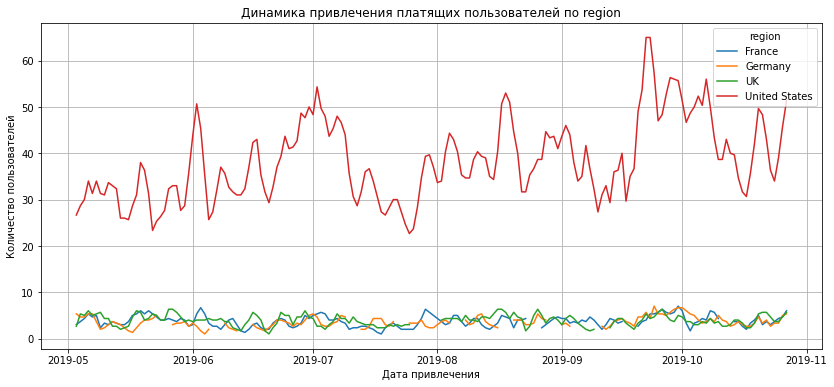

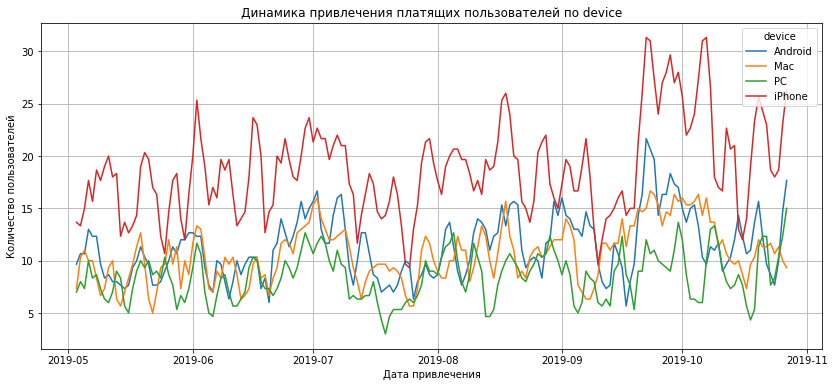

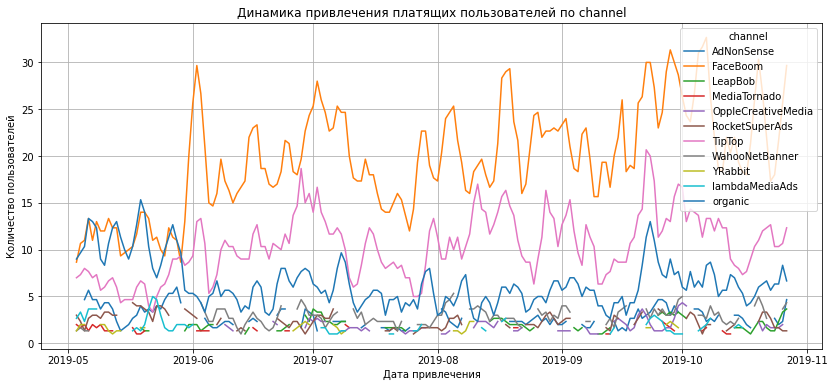

In [20]:
parameters = ['region', 'device', 'channel']
for parameter in parameters:
    df = profiles.query('payer==True').pivot_table(
    index = 'dt',
    columns = parameter,
    values = 'user_id',
    aggfunc = 'count'
    )
    #используем нашу функцию для сглаживания данных
    fig = filter_data(df, 3).plot(grid = True, figsize=(14,6))
    plt.title(f'Динамика привлечения платящих пользователей по {parameter}')
    plt.xlabel('Дата привлечения')
    plt.ylabel('Количество пользователей')
    plt.legend(title=parameter, loc='upper right')
    plt.show()

Как мы видим, визуально графики имеют схожую направленность.  

**Страна**  
Значительно выделяются пользователи из Соединенных штатов. Ежедневное количество их пользователей варьируется в диапазоне 500-700, и не опускается ниже отметки в 300 человек. Пиковые значения наблюдаются в конце сентября, что могло быть связано с проведением успешной рекламной кампании. Для остальных стран - количество колеблется на уровне 100 пользователей ежедневно.  
Среди платящих пользователей, также лидирует США. Ежедневно регистрируется порядка 30-50 человек, к концу сентября наблюдается всплеск. Остальные страны приносят не более 10 платящих пользователей в день.  

**Устройство**  
Среди всех устройств и пользователей мы также можем наблюдать схожую траекторию колебаний. Можно сказать, что к середине каждого месяца (кроме мая и августа) мы видим спад активности, а к концу одного/началу другого месяца - всплески. В конце сентября снова наблюдаем пиковые значения как для всех пользователей, так и для платящих.  
Ежедневно регистрируется в среднем 300 владельцев iPhone-ов и порядка 150-200 человек с других устройств. Среди платящих пользователей, приблизительно 15-20 человек с iPhone и 5-15 - остальные устройства.  

**Рекламные источники**  
В мае с органическим трафиком пришло порядка 500 пользователей, но к концу месяца наблюдается резкий спад, в то время как остальные каналы привлеченя начинают показывать рост. С июня FaceBoom и Tiptop привлекают порядка 100-200 пользователей ежедневно.  
Среди платящих пользователей, больше всего приходят с рекламы FaceBoom - 15-25 человек и Tiptop - 5-15 человек стабильно.

**Вывод**  

Ознакомились с профилями пользователей, привлеченых с 01 мая по 27 октября 2019г.  
- США лидирует по количеству пользователей - 100 тыс. всего и 6900 платящих или 6.9%. В динамике таже показывает лучший результат - порядка 300-700 человек ежедневно (30-50 человек - платящих). В остальных странах - от 15 до 17,5 тыс. пользователей всего, и ~ 100 человек ежедневно (и не боллее 10 платящих клиентов).  
- Клиенты приложения предпочитают использовать его на смартфонах, так среди устройств лидируют iPhone (54500 пользователей) и Android (35тыс.пользователей). Платные клиенты выбирают скачивать приложение на устройство Mac (1912 пользователей или 6.36%) и iPhone (3382 пользователей или 6.21%). Ежедневно с устройств iPhone регистрируется 300 человек и порядка 15-20 платящих, остальные устройства приносят около 150-200 пользователей и 10 платящих.  
- Основной канал привлечения клиентов - organic (более 56тыс. человек), далее идут FaceBoom и Tiptop, которые также лидируют и по количеству платных клиентов. С июня каналы FaceBoom и Tiptop приводят порядка 100-200 пользователей ежедневно и 10-20 платящих клиентов.  
На всех графиках в конце сентября наблюдаются пиковые значения, что может говорить о проведении успешной рекламной кампании.

## Маркетинг 

**Посчитаем общую сумму расходов на маркетинг и выясним, сколько денег потратили на каждый рекламный источник.**

In [21]:
print('Общая сумма расходов на маркетинг составила {}'.format(round(costs['costs'].sum(),1)))

Общая сумма расходов на маркетинг составила 105497.3


In [22]:
#проверим значение из таблицы profiles
round(profiles['acquisition_cost'].sum(),1)

105497.3

In [23]:
expenses = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)
expenses['perc_of_total'] = round(expenses['costs']/expenses['costs'].sum() *100,1)
expenses

costs  perc_of_total
channel                                    
TipTop              54751.30           51.9
FaceBoom            32445.60           30.8
WahooNetBanner       5151.00            4.9
AdNonSense           3911.25            3.7
OppleCreativeMedia   2151.25            2.0
RocketSuperAds       1833.00            1.7
LeapBob              1797.60            1.7
lambdaMediaAds       1557.60            1.5
MediaTornado          954.48            0.9
YRabbit               944.22            0.9

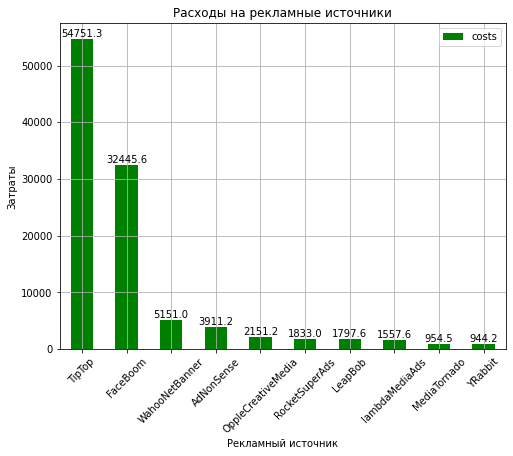

In [24]:
ax = expenses.plot(kind='bar', grid=True, figsize=(8, 6), color='green', y='costs')
ax.set_title("Расходы на рекламные источники")
ax.set_xlabel("Рекламный источник")
ax.set_ylabel("Затраты")

rects = ax.patches
labels = [round(expenses['costs'][i],1) for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )
plt.xticks(rotation=45)
plt.show()

Всего, за исследуемый период, на рекламу было потрачено почти 105500 ден.ед. Более 50% всего рекламного бюджета ушло на TipTop и 31% на FaceBoom. На остальные рекламные каналы ушло чуть более 17% от общего бюджета ~ от 950 до 5000 ден.единиц за весь исследуемый период.  
Здесь стоит отметить, что самый дорогой канал TipTop приводит меньше пользователей (как всего, так и платных) чем FaceBoom.

**Построим графики динамики изменения расходов по дням, неделям, месяцам по каждому источнику.**

In [25]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = pd.to_datetime(costs['dt']).dt.month  
costs['week'] = costs['dt'].dt.isocalendar().week

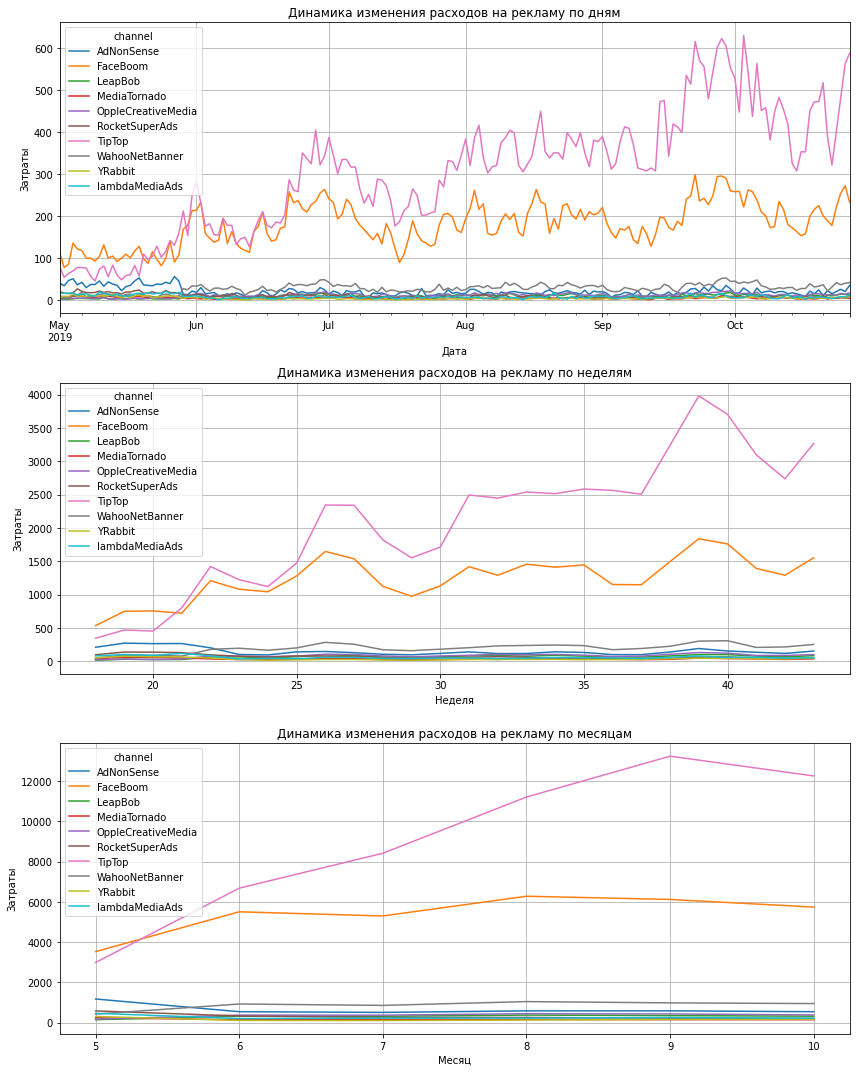

In [26]:
plt.figure(figsize=(12, 15))
ax1 = plt.subplot(3, 1, 1)
costs.pivot_table(
    index='dt', 
    columns='channel', 
    values='costs', 
    aggfunc='sum'
).plot(grid = True, ax=ax1)
plt.title('Динамика изменения расходов на рекламу по дням')
plt.xlabel('Дата')
plt.ylabel('Затраты')

ax2 = plt.subplot(3, 1, 2)
costs.pivot_table(
    index='week', 
    columns='channel',  
    values='costs',  
    aggfunc='sum',  
).plot(grid=True, ax=ax2) 
plt.ylabel('Затраты')
plt.xlabel('Неделя')
plt.title('Динамика изменения расходов на рекламу по неделям')

ax3 = plt.subplot(3, 1, 3)
costs.pivot_table(
    index='month', 
    columns='channel',  
    values='costs',  
    aggfunc='sum',  
).plot(grid=True, ax=ax3)
plt.ylabel('Затраты')
plt.xlabel('Месяц')
plt.title('Динамика изменения расходов на рекламу по месяцам')
plt.tight_layout()
plt.show() 

Все три графика показывают тенденцию к росту затрат на каналы TipTop и FaceBoom. Пиковые значения видим в конце сентября, что теперь объясняет активный рост привлечения пользователей в этот период. На графиках прослеживается закономерность, в даты, где затраты на рекламу снижались, падало и количество новых пользователей и наоборот - рост затрат приносил больше клиентов.  
Динамика затрат на остальные рекламные каналы не сильно меняется за исследуемый период, разве что для каналов AdNonSense и WahooNetBanner - с конца мая уменьшили затраты на рекламу в AdNonSense и увеличили расход средств на канал WahooNetBanner. Далее их линии на графике практически не меняются. 

**Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.**

In [27]:
profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending=False)

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

In [28]:
avg_user_cost = round(profiles.query('channel !="organic"')['acquisition_cost'].mean(),2)
print('Средняя стоимость привлечения одного клиента составляет {} ден.ед.'.format(avg_user_cost))

Средняя стоимость привлечения одного клиента составляет 1.13 ден.ед.


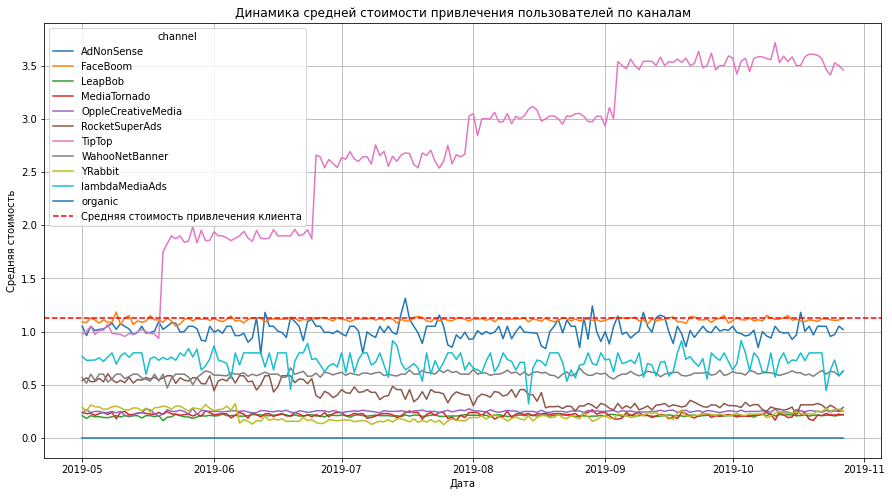

In [29]:
profiles.pivot_table(
    index='dt',
    columns='channel', 
    values='acquisition_cost', 
    aggfunc='mean'
).plot(grid = True, figsize=(15,8))
plt.title('Динамика средней стоимости привлечения пользователей по каналам')
plt.xlabel('Дата')
plt.ylabel('Средняя стоимость')
plt.axhline(y=avg_user_cost, color='red', linestyle='--', label='Средняя стоимость привлечения клиента')
plt.legend(title=parameter, loc='upper left')
plt.show()

Средняя стоимость привлечения одного клиента за весь исследуемый период составила 1.13 ден.ед.  
Самая дорогая реклама у канала TipTop - 2.8 ден.ед., что почти в полтора раза больше средней стоимости привлечения клиента.  
Стоимость привлечения одного клиента из остальных каналов не превышает общей средней, самая низкая стоимость одного клиента из канала LeapBob - 0.21 ден.ед.  
График динамики средней стоимости привлечения наглядно демонстрирует, что средняя стоимость пользователя из канала TipTop резко возрастает в течение всего периода. Пики роста наблюдаются примерно раз в месяц. Для каналов AdNonSense и lambdaMediaAds наблюдаются колебания стоимости за исследуемый период, но в среднем находятся на уровне 1ден.ед и 0.75 ден.ед соответственно. С конца июня средняя стоимость клиента из источника RocketSuperAds снижается ~ с 0.5 до 0.3 ден.ед., для остальных каналов средняя стоимость привлечения относительно стабильна.

**Вывод.**  

- За весь исследуемый период на рекламу приложения было потрачено порядка 105500 ден.ед.  
- Более 80% всего рекламного бюджета ушло на каналы TipTop и FaceBoom. В динамике эти два канала показывают значительный рост расходов, особенно у канала TipTop к концу сентября 2019.  
- Средняя стоимость привлечения одного клиента составила 1.13 ден.ед.
- Дороже всего обошлась реклама из канала TipTop - 2.8 ден.ед. на одного пользователя, далее идут FaceBoom и AdNonSense (1.11 и 1.01 ден.ед.) соответственно.
- За период, средняя стоимость привлечения одного пользователя из канала TipTop резко возрастает приблизительно раз в месяц, для остальных каналов средняя стоимость привлечения относительно стабильна.

## Окупаемость рекламы



Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.  
Исключим органический трафик из данных о пользователях.

In [30]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
profiles = profiles.query('channel !="organic"')

**Проанализируем общую окупаемость рекламы c помощью графиков LTV и ROI и графиков динамики LTV, CAC и ROI.**

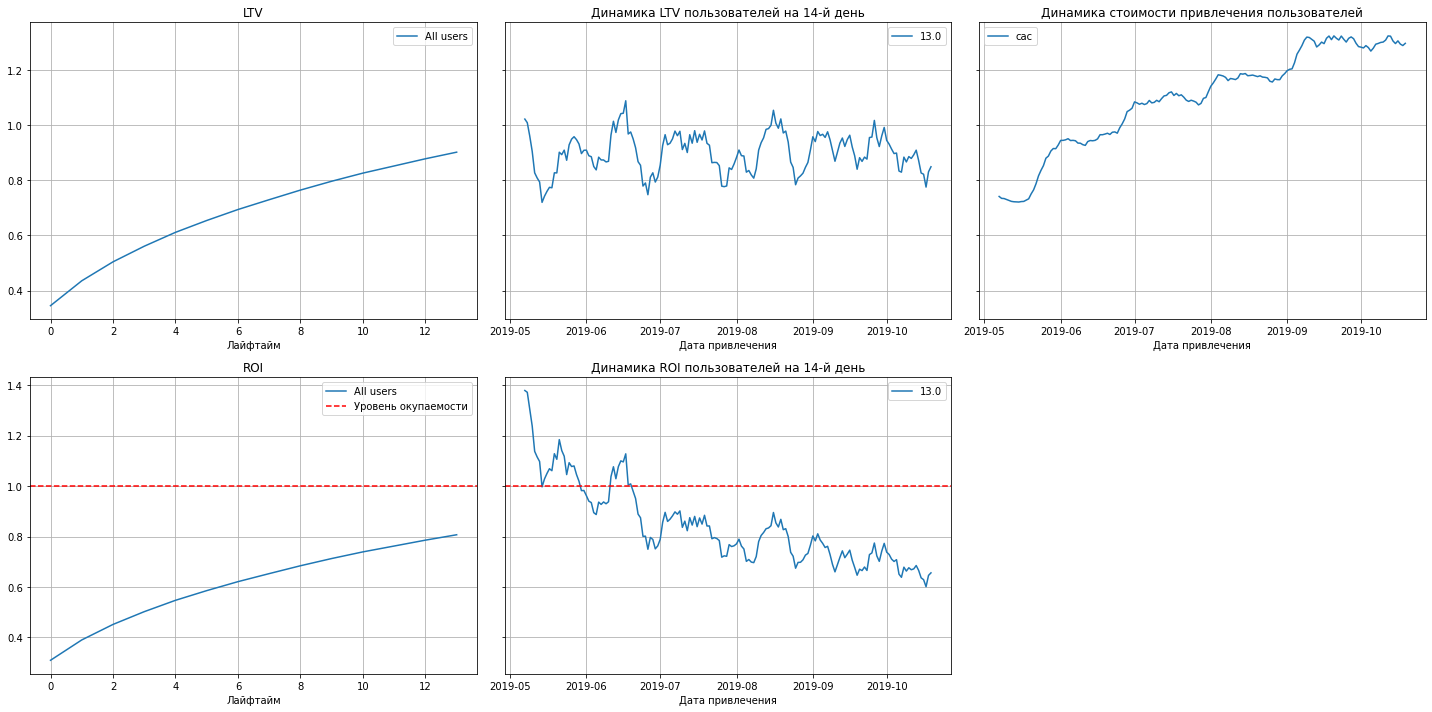

In [31]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days) 

Динамика LTV демонстрирует относительную стабильность. LTV плавно растёт и не снижается. Значит, дело не в ухудшении качества пользователей.  
В целом реклама не окупается. ROI в конце второй недели — чуть выше 80%. Только в мае мы можем наблюдать окупаемость рекламы, но далее, на протяжении всего периода, ROI снижается ниже порога окупаемости.  
САС нестабилен и с конца мая скачкообразно растет, что вероятно связано с рекламным каналом TipTop, который показывает схожий график средней стоимости привлечения пользователей по данному каналу.  Вероятно проблема связана с увеличением рекламного бюджета.  

**Далее рассмотрим окупаемость рекламы по всем доступным характеристикам пользователей — стране, устройству и источнику.**  

`Окупаемость с разбивкой по странам`

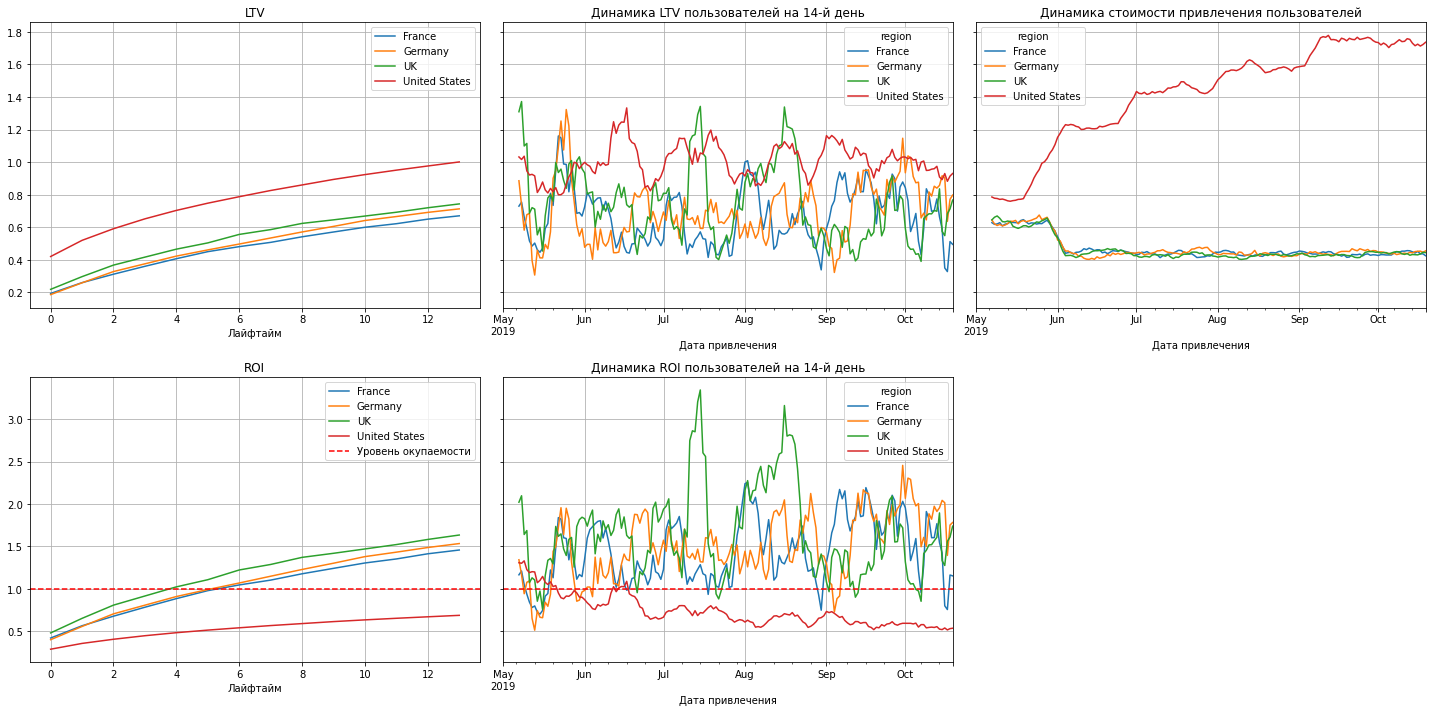

In [32]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region'])
plot_ltv_roi(
    ltv, ltv_history, roi, roi_history, horizon_days, window=7)

Интересным образом разворачивается картина для пользователей из США - LTV растет и показывает лучший результат по странам, но с конца мая стоимость привлечения пользователей скачкообразно растет, что сказывается на окупаемости рекламы, которая в динамике с конца мая находится ниже порога окупаемости. Возможно дело в удержании клиентов.   
Для остальных стран все куда радужнее - с начала июня стоимость привлечения пользователей снижается и далее держится приблизительно на одном уровне, уже на 5-7 день "жизни" реклама окупается.  

`Окупаемость с разбивкой по устройствам`   

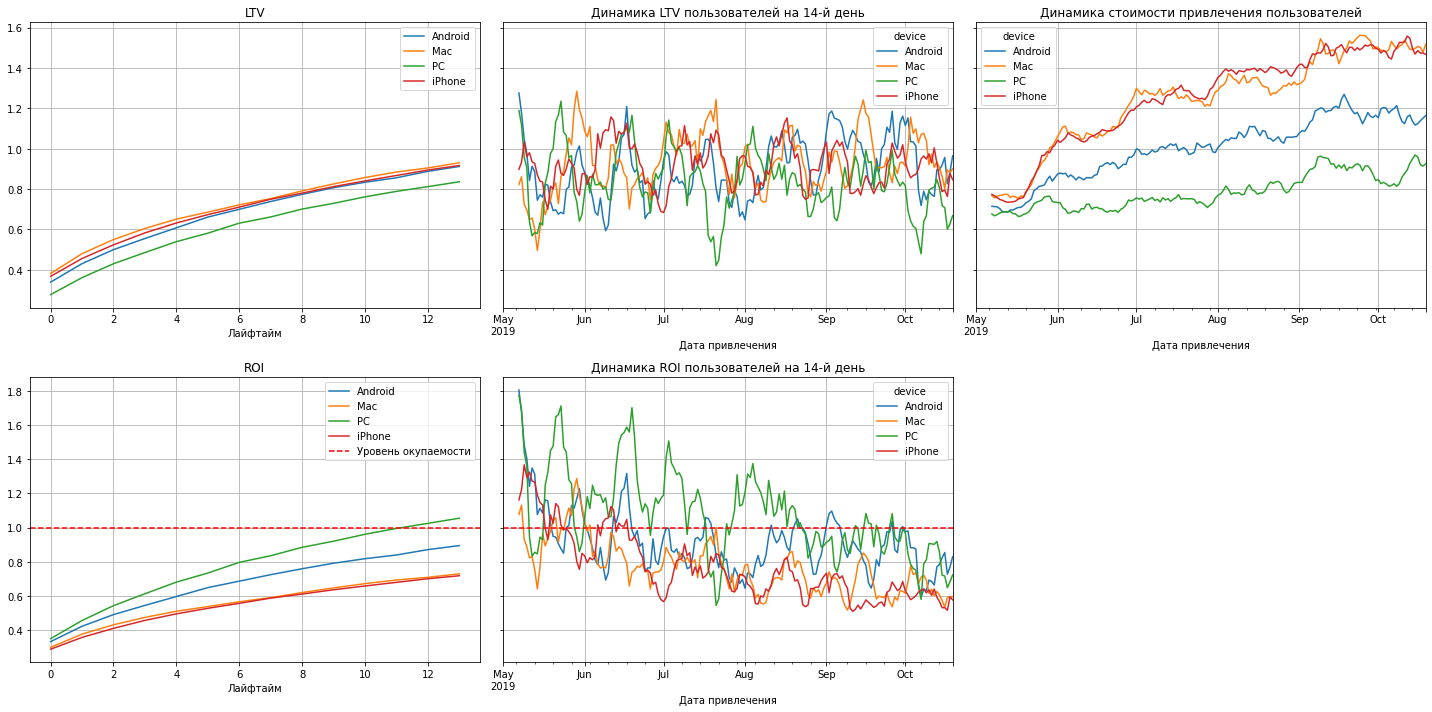

In [33]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device'])
plot_ltv_roi(
    ltv, ltv_history, roi, roi_history, horizon_days, window=7)

На 12-й день "жизни" окупаются только пользователи РС, в динамике они также окупаются бОльшую часть периода. При этом затраты на привлечения РС-пользователей растут, но в меньшей степени относительно других устройств. Стоит обратить внимание на устройства Mac и iPhone - с конца мая затраты на привлечение пользователей значительно растут и их стоимость самая высокая, а окупаемость находится на самом низком уровне.  

`Окупаемость с разбивкой по каналам`   

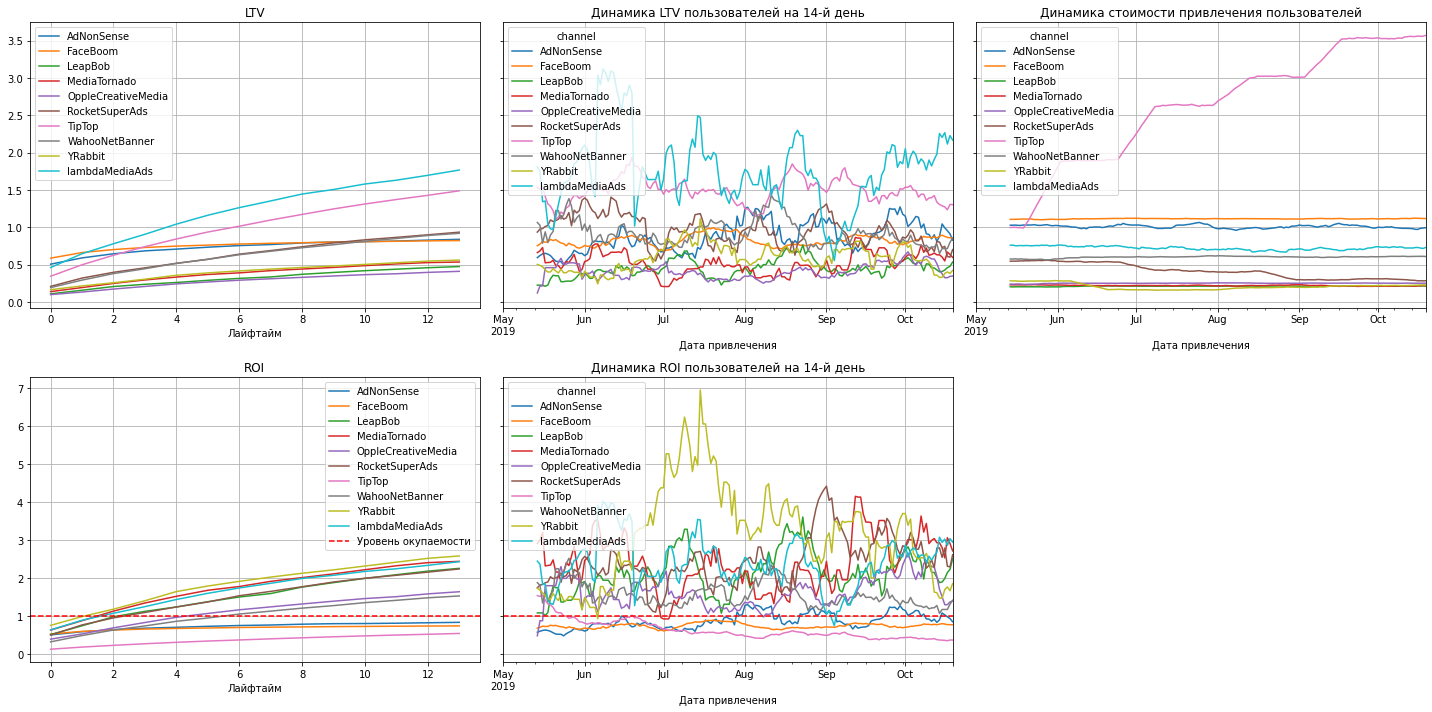

In [34]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel'])
plot_ltv_roi(
    ltv, ltv_history, roi, roi_history, horizon_days, window=14)

Вот и одна из причин всех проблем. При значительном ежемесячном росте стоимости привлечения пользователей через канал Tiptop, реклама этого канала не окупается и с конца мая показатель ROI находится ниже порога окупаемости на протяжении исследуемого периода.  
Не окупается реклама и через каналы FaceBoom (который лидирует по количеству привлеченных клиентов как всего, так и платящих) и AdNonSense.  
Остальные каналы окупаются за первую неделю. Самый высокий показатель у канала YRabbit. В динамике ROI этот канал значительно выделяется - за июль 2019 г. он показывает аномально высокие значения, что возможно связано с сезонностью?  
Самый высокий LTV показывает канал lambdaMediaAds и TipTop (так же и в динамике на 14-й день).  


**Далее рассмотрим конверсию и удержание клиентов по всем доступным характеристикам пользователей — стране, устройству и источнику.**  

`Конверсия и удержание с разбивкой по странам`

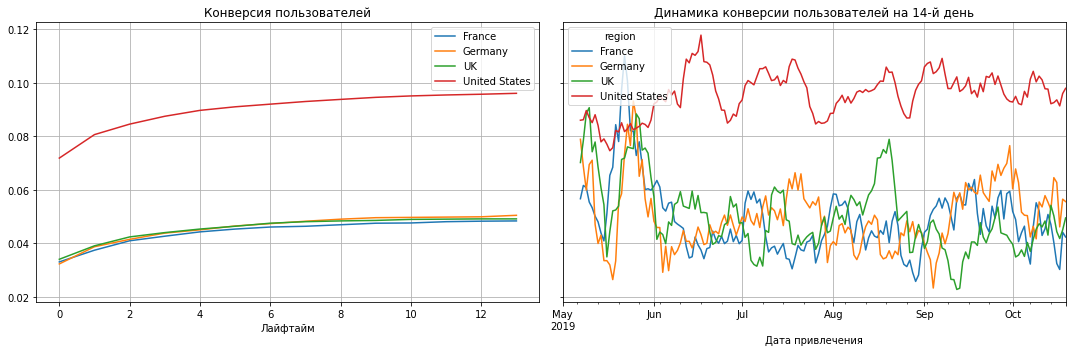

In [35]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)
plot_conversion(conversion, conversion_history, horizon_days)

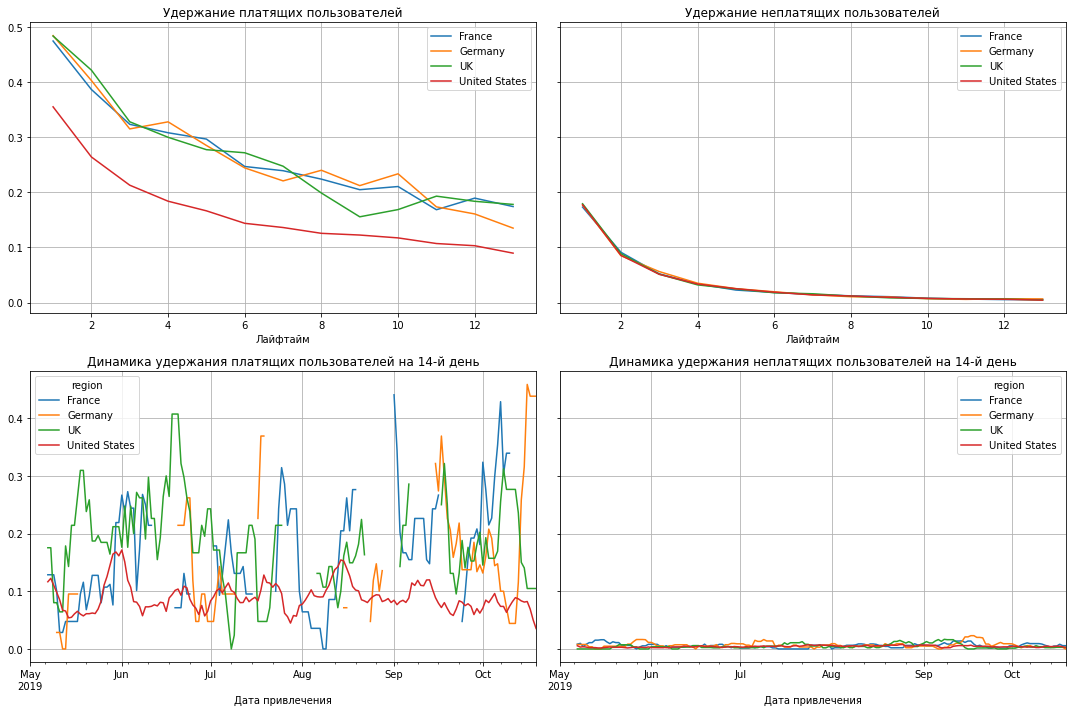

In [36]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)
plot_retention(retention, retention_history, horizon_days)

- Конверсия пользователей из США почти в два раза выше конверсий из других стран при этом удержание платящих пользователей самое низкое как в целом, так и в динамике - это проблема.  
- Динамика конверсии пользователей также показывает высокий уровень для клиентов из США, еще можно отметить интересный момент, в конце мая конверсия пользователей из Франции, Германии и Великобритании резко подскочила, в то время как у США снизилась. Что-то значимое произошло в конце мая, что практически на всех графиках явно обозначается это событие. И в начале июня динамика конверсии 14-го для пользователей США пошла вверх, для остальных стран резко снизилась (бросили все силы и средства на США?)  
- Уровень удержания платящих клиентов выше, чем у неплатящих. В динамике на 14-й день удержание неплатящих пользователей "скользит" у нулевой отметки, удержание же платящих значительно отличается и подвержено сильным колебаниям, что скорее всего связано с небольшим количеством платящих пользователей.  


`Конверсия и удержание с разбивкой по устройствам`

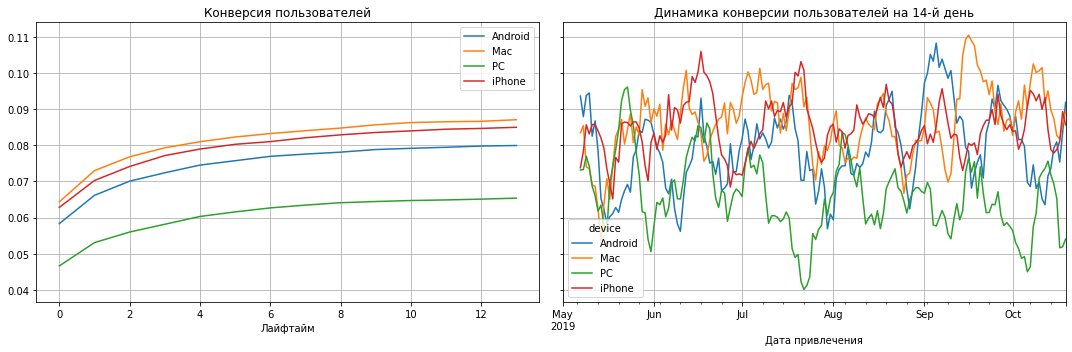

In [37]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)
plot_conversion(conversion, conversion_history, horizon_days)

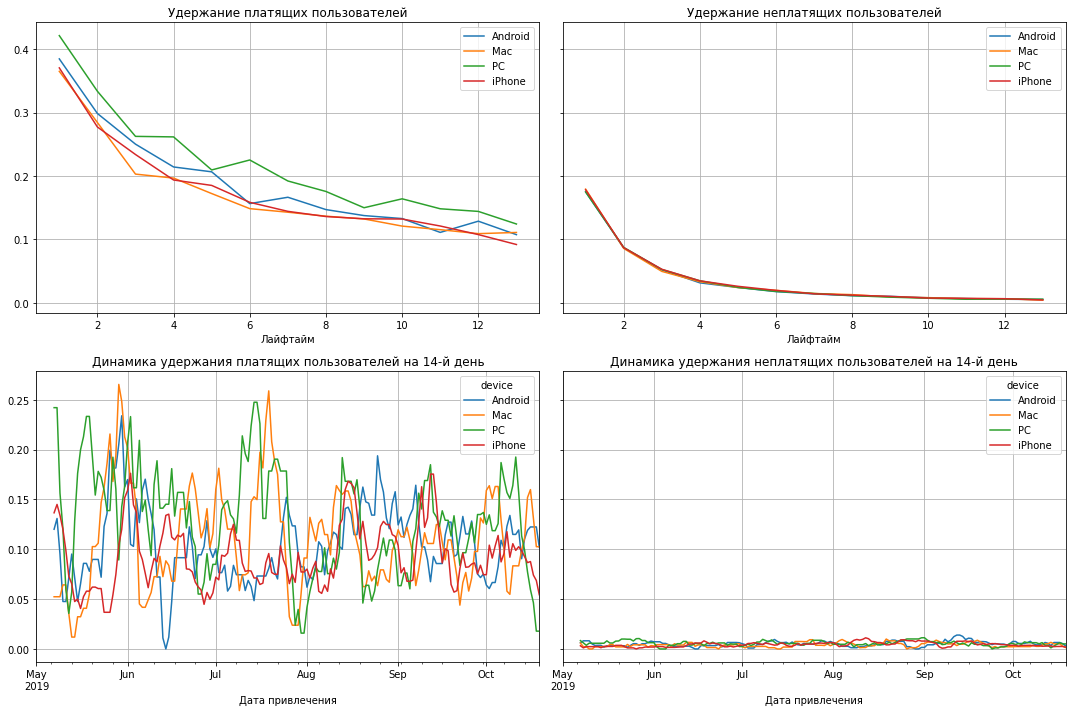

In [38]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)
plot_retention(retention, retention_history, horizon_days)

Выше остальных показатель конверсии у владельцев Mac, далее идут обладатели Iphone, Android и PC.  
По удержанию наблюдается другая картина. Среди платящих пользователей чаще остальных возвращаются владельцы РС, они же единственные, кто показывает окупаемость рекламы.  

`Конверсия и удержание с разбивкой по каналам`

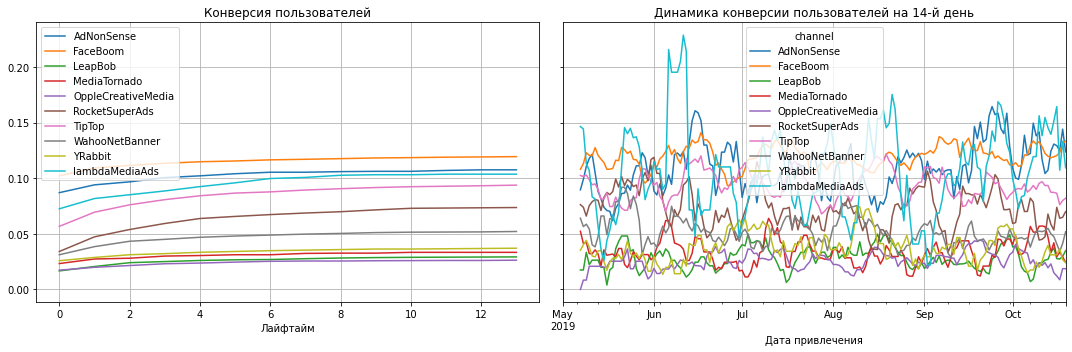

In [39]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)
plot_conversion(conversion, conversion_history, horizon_days)

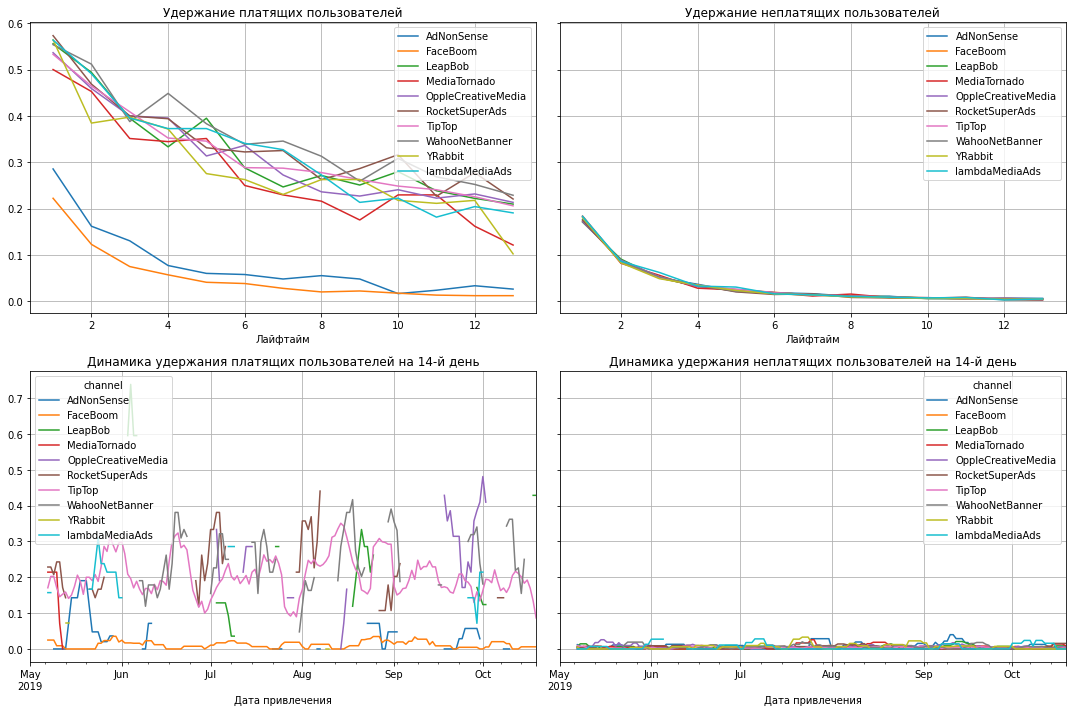

In [40]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)
plot_retention(retention, retention_history, horizon_days)

Самая высокая конверсия у каналов FaceBoom, AdNonSense и lambdaMediaAds и только далее идет наш фаворит по затратам и количеству привлеченных пользователей - TipTop.  
Самое низкое удержание для платящих пользователей показывают каналы AdNonSense и FaceBoom, у остальных источников показатель удержания достаточно высокий.  
В динамике мы видим неоднородный график для платящих пользователей, что может быть связано как с малым количеством платящих клиентов в данных каналах, так и с их отсутствием вовсе.

На данном этапе у нас есть пара значимых моментов: рынок США с высокой конверсией, но низким удержанием, и два крупных рекламных игрока FacaBoom и TipTop с высокой конверсией, но большими затратами и следствием - неокупаемостью.  

Попробуем посмотреть на графики с разрезе рынков (США и Европа) и каналов привлечения, чтобы выяснить из каких каналов именно приходят пользователи и все ли они так плохо удерживаются.  

**United States**

In [41]:
test = profiles.query('region == "United States"')

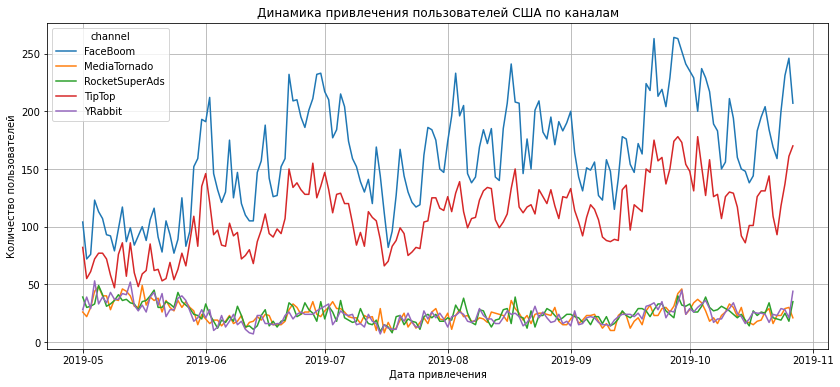

In [42]:
test.pivot_table(
    index='dt', 
    columns='channel', 
    values = 'user_id', 
    aggfunc = 'count'
).plot(grid = True, figsize=(14,6))
plt.title('Динамика привлечения пользователей США по каналам')
plt.xlabel('Дата привлечения')
plt.ylabel('Количество пользователей')
plt.legend(title='channel', loc='upper left')
plt.show()

На рынке США по количеству привлечения лидируют каналы FaceBoom и TipTop, все также наблюдаем в конце мая рост привлечения для лидирующих каналов и спад для остальных.  

Посмотрим на среднюю стоимость привлечения в динамике.

In [43]:
avg_user_costtest = round(test['acquisition_cost'].mean(),2)

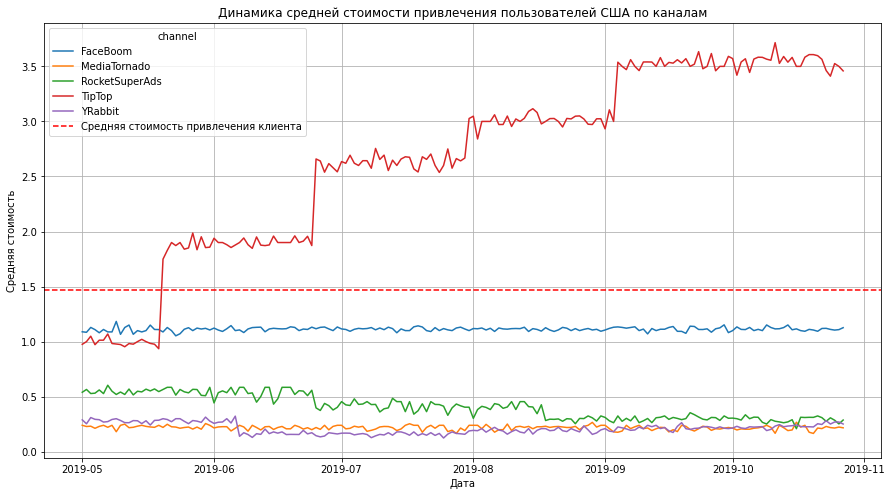

In [44]:
test.pivot_table(
    index='dt',
    columns='channel', 
    values='acquisition_cost', 
    aggfunc='mean'
).plot(grid = True, figsize=(15,8))
plt.title('Динамика средней стоимости привлечения пользователей США по каналам')
plt.xlabel('Дата')
plt.ylabel('Средняя стоимость')
plt.axhline(y=avg_user_costtest, color='red', linestyle='--', label='Средняя стоимость привлечения клиента')
plt.legend(title=parameter, loc='upper left')
plt.show()

Средняя стоимость привлечения пользователей выросла, что безусловно является заслугой канала TipTop. Видим уже знакомый скачкообразный рост TipTop, достаточно ровную динамику у FaceBoom и небельшое уменьшение средней стоимости для остальных каналов.  

Посмотрим на LTV и ROI.

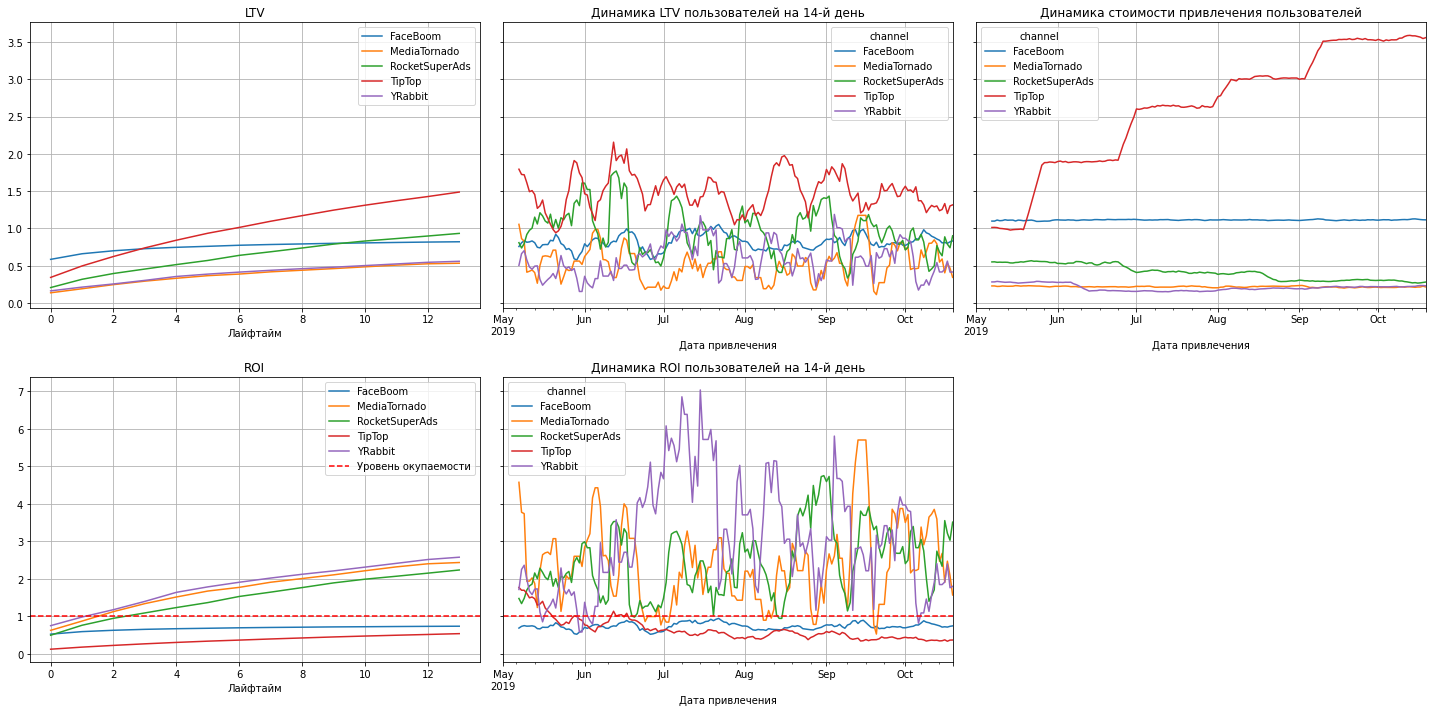

In [45]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    test, orders, observation_date, horizon_days, dimensions=['channel'])

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days) 

Самый высокий LTV у канала TipTop и к концу второй недели "жизни" почти в два раза превышает ценность FaceBoom. При этом оба канала убыточны, когда остальные каналы окупаются уже на 3-4 день.  

Остается конверсия и удержание.

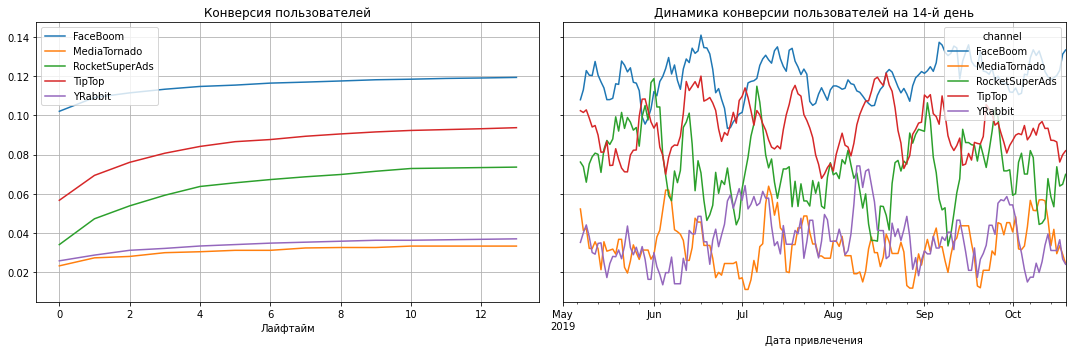

In [46]:
conversion_raw, conversion, conversion_history = get_conversion(
    test, orders, observation_date, horizon_days, dimensions=['channel'])
plot_conversion(conversion, conversion_history, horizon_days)

У FaceBoom хороший показатель конверсии - уже в первые дни каждый десятый пользователь совершает покупку. Уровень конверсии TipTop ниже, но от начальной точки к концу второй недели вырос почти в полтора раза.

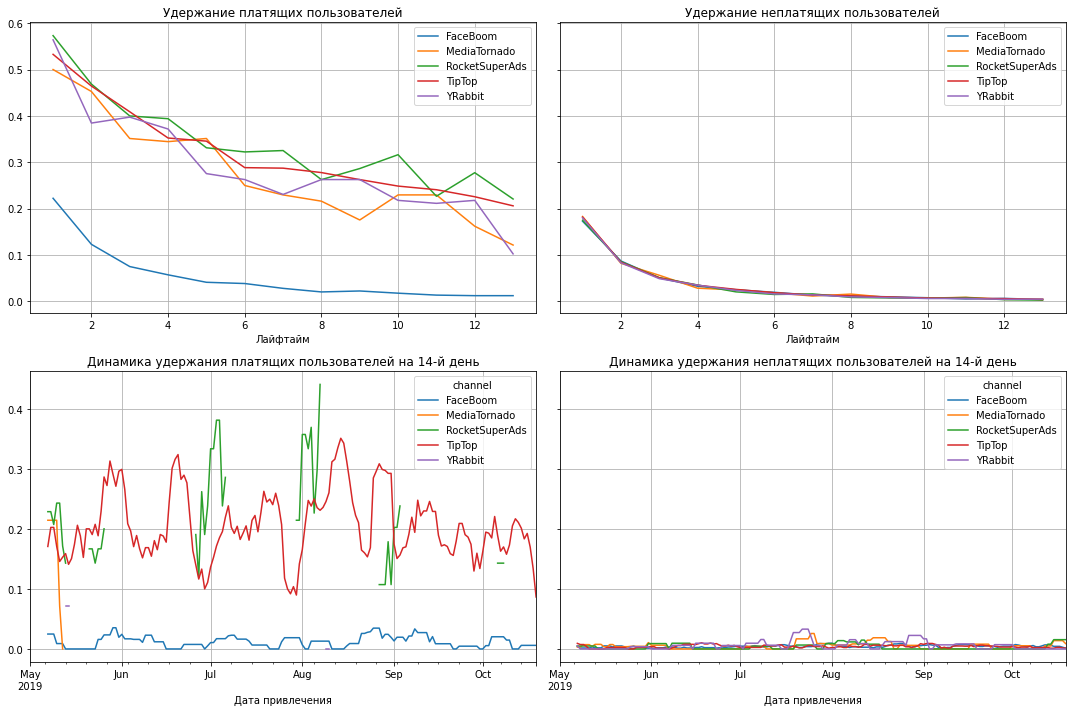

In [47]:
retention_raw, retention, retention_history = get_retention(
    test, visits, observation_date, horizon_days, dimensions=['channel']
)
plot_retention(retention, retention_history, horizon_days)

Среди всех каналов, самый низкий уровень удержания платных пользователей у FaceBoom. Это подтверждает и динамика удержания. Видим что в динамике практически отсутствуют данные MediaTornado и YRabbit, что связано с небольшим количеством наблюдений.

**France, Germany, UK**

In [48]:
test2 = profiles.query('region != "United States"')

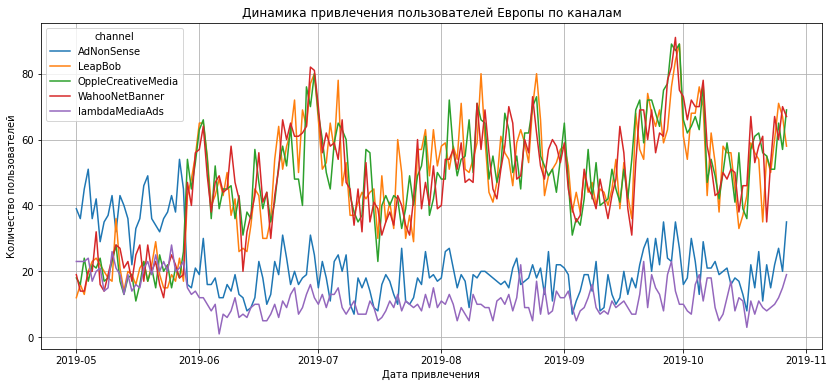

In [49]:
test2.pivot_table(
    index='dt', 
    columns='channel', 
    values = 'user_id', 
    aggfunc = 'count'
).plot(grid = True, figsize=(14,6))
plt.title('Динамика привлечения пользователей Европы по каналам')
plt.xlabel('Дата привлечения')
plt.ylabel('Количество пользователей')
plt.legend(title='channel', loc='upper left')
plt.show()

Теперь известно, что для рынка США и Европы используются разные каналы привлечения.  
LeapBob, OppleCreativeMedia и WahooNetBanner лидируют по количеству привлеченных пользователей и их графики имеют схожую направленность. Видим четкое изменение картины с конца мая, число пользователей из AdNonSense и lambdaMediaAds существенно сократилось и далее находится примерно на одном уровне.

In [50]:
avg_user_costtest2 = round(test2['acquisition_cost'].mean(),2)

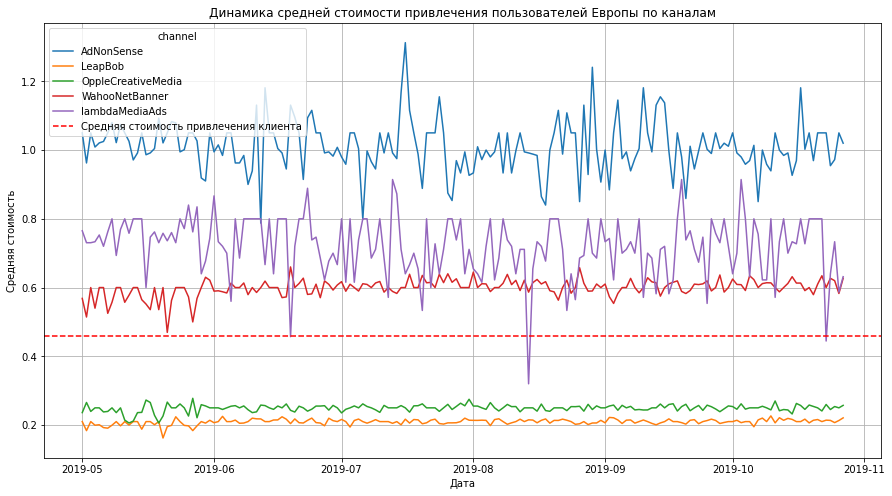

In [51]:
test2.pivot_table(
    index='dt',
    columns='channel', 
    values='acquisition_cost', 
    aggfunc='mean'
).plot(grid = True, figsize=(15,8))
plt.title('Динамика средней стоимости привлечения пользователей Европы по каналам')
plt.xlabel('Дата')
plt.ylabel('Средняя стоимость')
plt.axhline(y=avg_user_costtest2, color='red', linestyle='--', label='Средняя стоимость привлечения клиента')
plt.legend(title=parameter, loc='upper left')
plt.show()

Без канала TipTop средняя стоимость привлечения значительно снизилась.  
Динамика AdNonSense и lambdaMediaAds показывает колебания в динамике, но находится приблизительно на уровне 1.0 и 0.7 соответственно. Для остальных каналов график достаточно ровный.  
Затраты на привлечение пользователей по трем каналам из пяти находятся выше уровня средней стоимости привлечения.

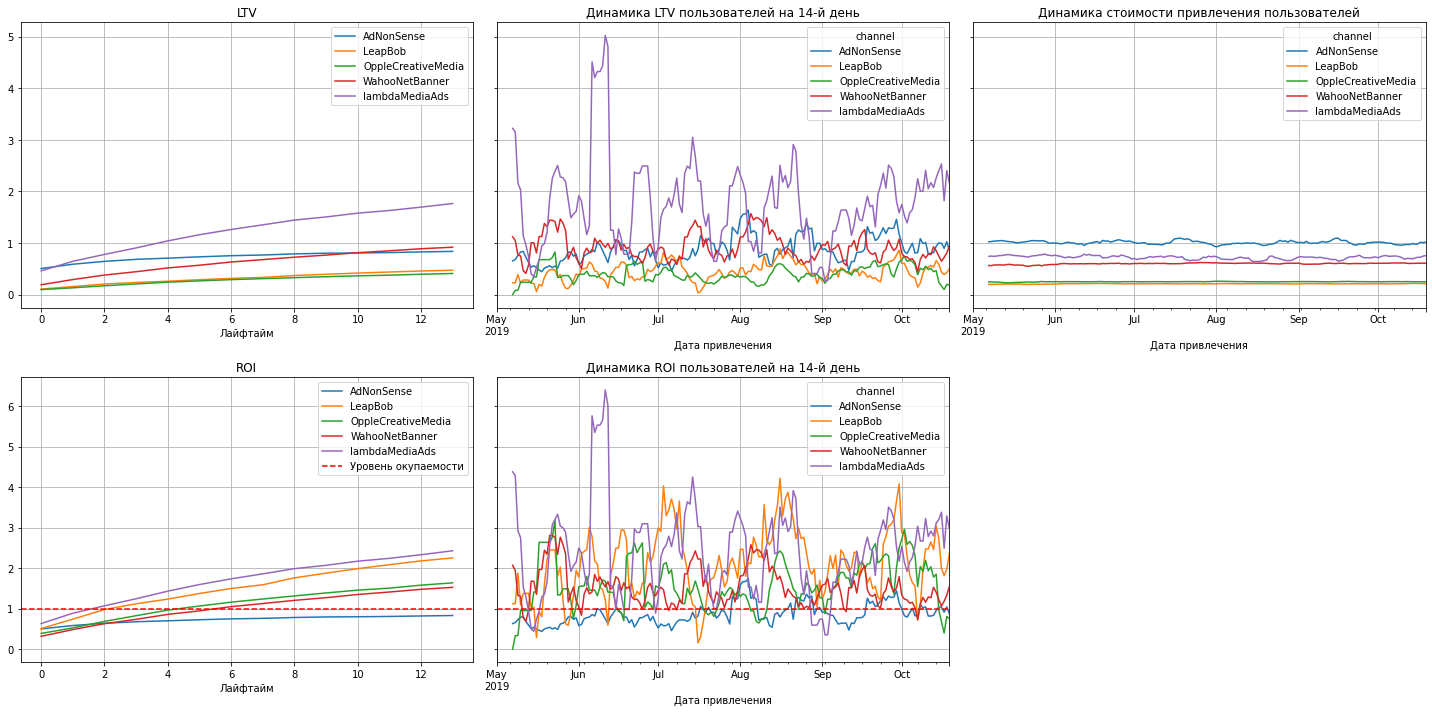

In [52]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    test2, orders, observation_date, horizon_days, dimensions=['channel'])

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days) 

AdNonSense единственный убыточный канал, остальные окупаются за первую неделю. Лучший показатель по LTV и ROI у канала lambdaMediaAds (хорошо себя показывает и в динамике). 

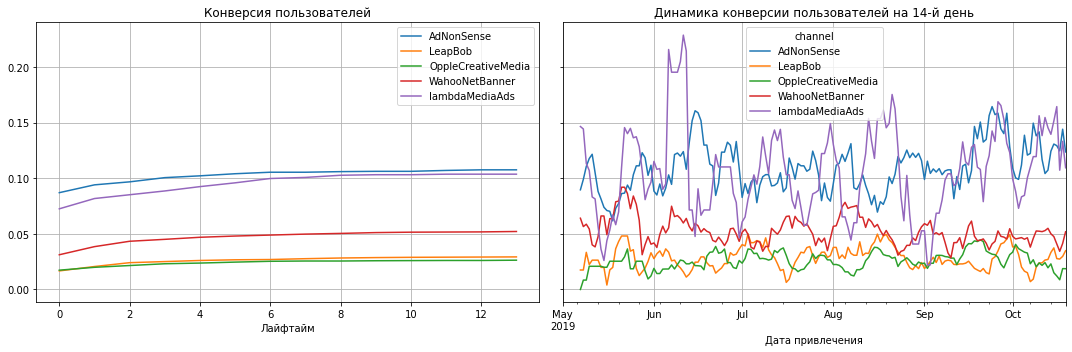

In [53]:
conversion_raw, conversion, conversion_history = get_conversion(
    test2, orders, observation_date, horizon_days, dimensions=['channel'])
plot_conversion(conversion, conversion_history, horizon_days)

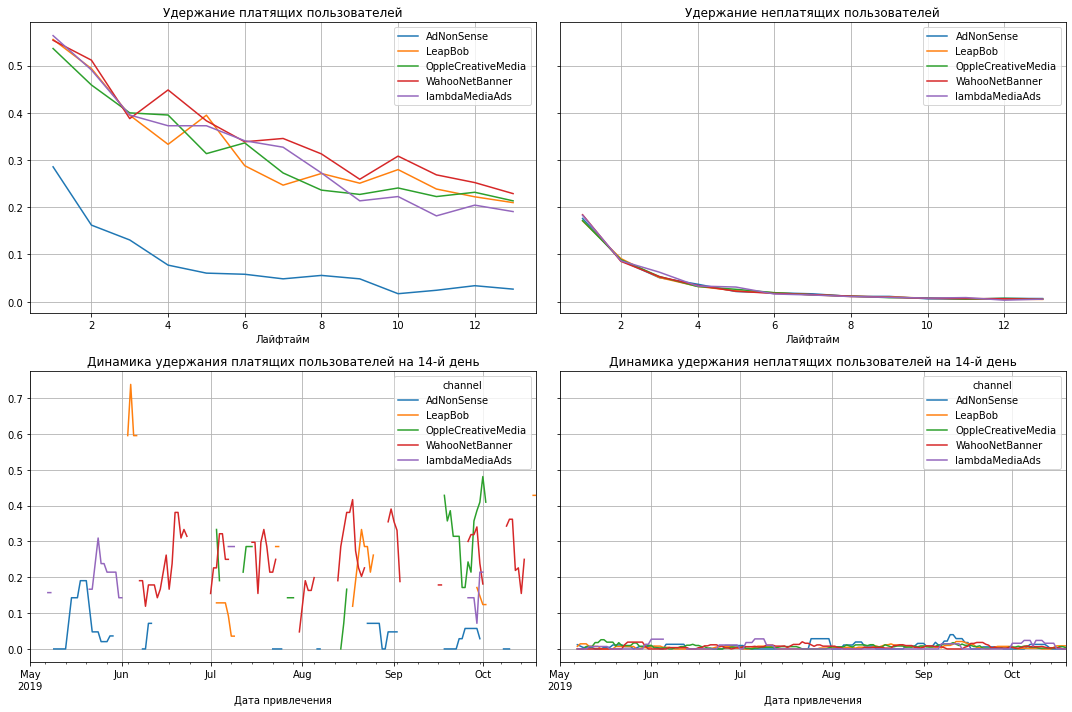

In [54]:
retention_raw, retention, retention_history = get_retention(
    test2, visits, observation_date, horizon_days, dimensions=['channel']
)
plot_retention(retention, retention_history, horizon_days)

Высокий уровень конверсии показывают каналы lambdaMediaAds и AdNonSense, но у последнего низкое удержание, явно стремящееся к нулю. Динамика платящих пользователей прирывистая, это также связано с количеством наблюденй - на каждую страну приходилось не более 700 платящих человек.

**Вывод.**  

**`Устройство`**  

- Средняя стоимость привлечения пользователей, владеющих iPhone и Mac, значительно возрастает за исследуемый период, что отрицательно сказывается на окупаемости. При этом, среди всех устройств, у них самый высокий показатель конверсии.  
- С другой стороны, среди платящих пользователей чаще остальных возвращаются владельцы РС,  и это устройство единстенное, которое окупается (в динамике он также окупается бОльшую часть периода).  

**`Страна`**  

- LTV  и конверсия пользователей из США растет и показывает лучший результат по странам. С конца мая стоимость привлечения пользователей скачкообразно растет, что сказывается на окупаемости рекламы, которая в динамике находится ниже порога окупаемости. Причиной этому является низкое удержание пользователей как в целом, так и в динамике.    
- Для стран Европы уже на 5-7 день "жизни" пользователей реклама окупается.  Самый высокий показатель ROI у пользователей из Великобритании. Среди всех трех стран показатель удержания находится на хорошем высоком уровне. С начала июня стоимость привлечения пользователей снижается и далее держится приблизительно на одном уровне.  

**`Каналы привлечения`** 

- для рынков США и Европы привлекаются разные рекламные каналы  
`США`
- Tiptop имеет одну из самых активных динамик по привлечению пользователей, отличные показатели по конверсии и удержанию пользователей, и одну из лучших LTV, но низкий неокупаюшийся ROI из-за очень высокого роста стоимости привлечения клиентов. 
- Faceboom показывает самую активную динамику привлечения, хорошие показатели по конверсии и неплохой LTV, но имеются явные проблемы с удержанием пользователей, и темпы роста стоимости привлечения пользователей выше среднего. Канал не окупается. 
- остальные каналы YRabbit, MediaTornado и RocketSuperAds крепкие "середнячки": динамика привлечения пользователей достаточно стабильна, умеренная конверсия и хороший показатель удержания, динамика стоимости привлечения не подвержена сильным колебаниям, так что по LTV они может и меньше, но по ROI лучше и окупаются уже в первую неделю "жизни". Особенно самый крепкий и уверенный "середнячок" - RocketSuperAds.  
`Европа`
- канал AdNonSense - несмотря на лучший показатель конверсии и неплохое LTV это единственный неокупившийся канал, удержание пользователей на очень низком уровне, стоимость привлечения при этом самая высокая.
-  канал lambdaMediaAds - лидирует практически по всем показателям, самый высокий уровень LTV и ROI (окупается уже в первые дни), хорошая конверсия и удержание. Если проработать количество привлеченных пользователей (улучшить объявление, кликабельный лозунг), то у этого канала определенно есть потенциал.
- в данном случае "середнячками" можно назвать каналы LeapBob, OppleCreativeMedia и WahooNetBanner. С конца мая динамика привлечения пользователей из Европы растет, стоимость привлечения при этом низкая (или близка к средней стоимости), умеренные показатели LTV и хорошее ROI (окупаются за первую неделю). С удержанием тоже все в порядке, пользователи охотно возвращаются в продук, стоит только поработать над конверсией. 

## Общие выводы   

Подводя итоги, можно сказать, что в целом, реклама, направленная на привлечение пользователей не окупается.  
Негативное влияние на это может оказывать:
- Активно растущая стоимость привлечения пользователей для устройств Mac и iPhone.
- Рост затрат на привлечение пользователей из США и низкий показатель их удержания
- Вложение в убыточный рекламный канал (TipTop) более 50% всего рекламного бюджета. Плохое удержание пользователей из каналов FaceBoom и AdNonSense.  

Места, на которые стоит обратить внимание:
- Количество платящих пользователей в Европе. В Германии, Франции и Великобритании только 4% от общего количества пользователей конвертируются в платящих, в то время как у США этот показатель 7%. Есть куда стремиться, стоить проверить воронку и выяснить на каком этапе могут возникать проблемы.  
- Распределение рекламного бюджета. Большие затраты на каналы, которые не окупаются. 
- Удержание клиентов. В частности из США, как самый крупный рынок компании с высоким показателем привлечения пользователей в динамике.  

**`Рекомендации для отдела маркетинга:`**  
1. Как можно чаще мониторить основные показатели и метрики компании, и при возможности оперативно корректировать возникающие проблемы.
2. Определить приемлемый для компании баланс выручки и ROI, инане будет повторятся данная ситуация - даже если реклама окупается, то привлекаются "копейки", что не очень эффективно. И наоборот - привлекается значительное количество пользователей, но компания терпит убытки.
3. Проанализировать поведение пользователей США. Привлекается большое количество клиентов но плохо удерживаются. Проанализировать рекламное объявление, правильно ли подобрана целевая аудитория, исключить возможные технические проблемы. Проработать email-рассылку, различные скидки и акции.
4. Проанализировать в компании событие, произошедшее в конце мая 2019г, возможно это также прольет свет на имеющие проблемы окупаемости и поможет избежать повторение ошибок (неверно посчитанные метрики? неправильно принятое решение?). 
5. Проработать взаимодействие с рекламными каналами. Для рынка Европы рекламная кампания подобрана хорошо. Можно рекомендовать обратить внимание на канал lambdaMediaAds, провести в тестовом режиме масштабирование этого канала и проанализировать результат. Для США очевидно стоит ограничить бюджет для канала TipTop, разобраться с прохим удержанием пользователей от FaceBoom. Также можно рекомендовать обратить внимание на канал RocketSuperAds, как один из наиболее устойчивых.
6. Привлекать больше пользователей РС, при наименьших затратах они единственные окупились среди всех устройств. Проблема iPnone и Мас кроится с высокой стоимости рекламы, при нормализации ценообразования это очень привлекательное направления, так как именно владельцы iPnone и Мас показывают лучшую конверсию и привлекают больше всего платящих пользователей.